### Import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

### Read data

In [2]:
data = pd.read_csv("sonar.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Check missing values

In [3]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

### Visualize numeric features

In [4]:
numCols = data.columns[:-1]
numCols

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64')

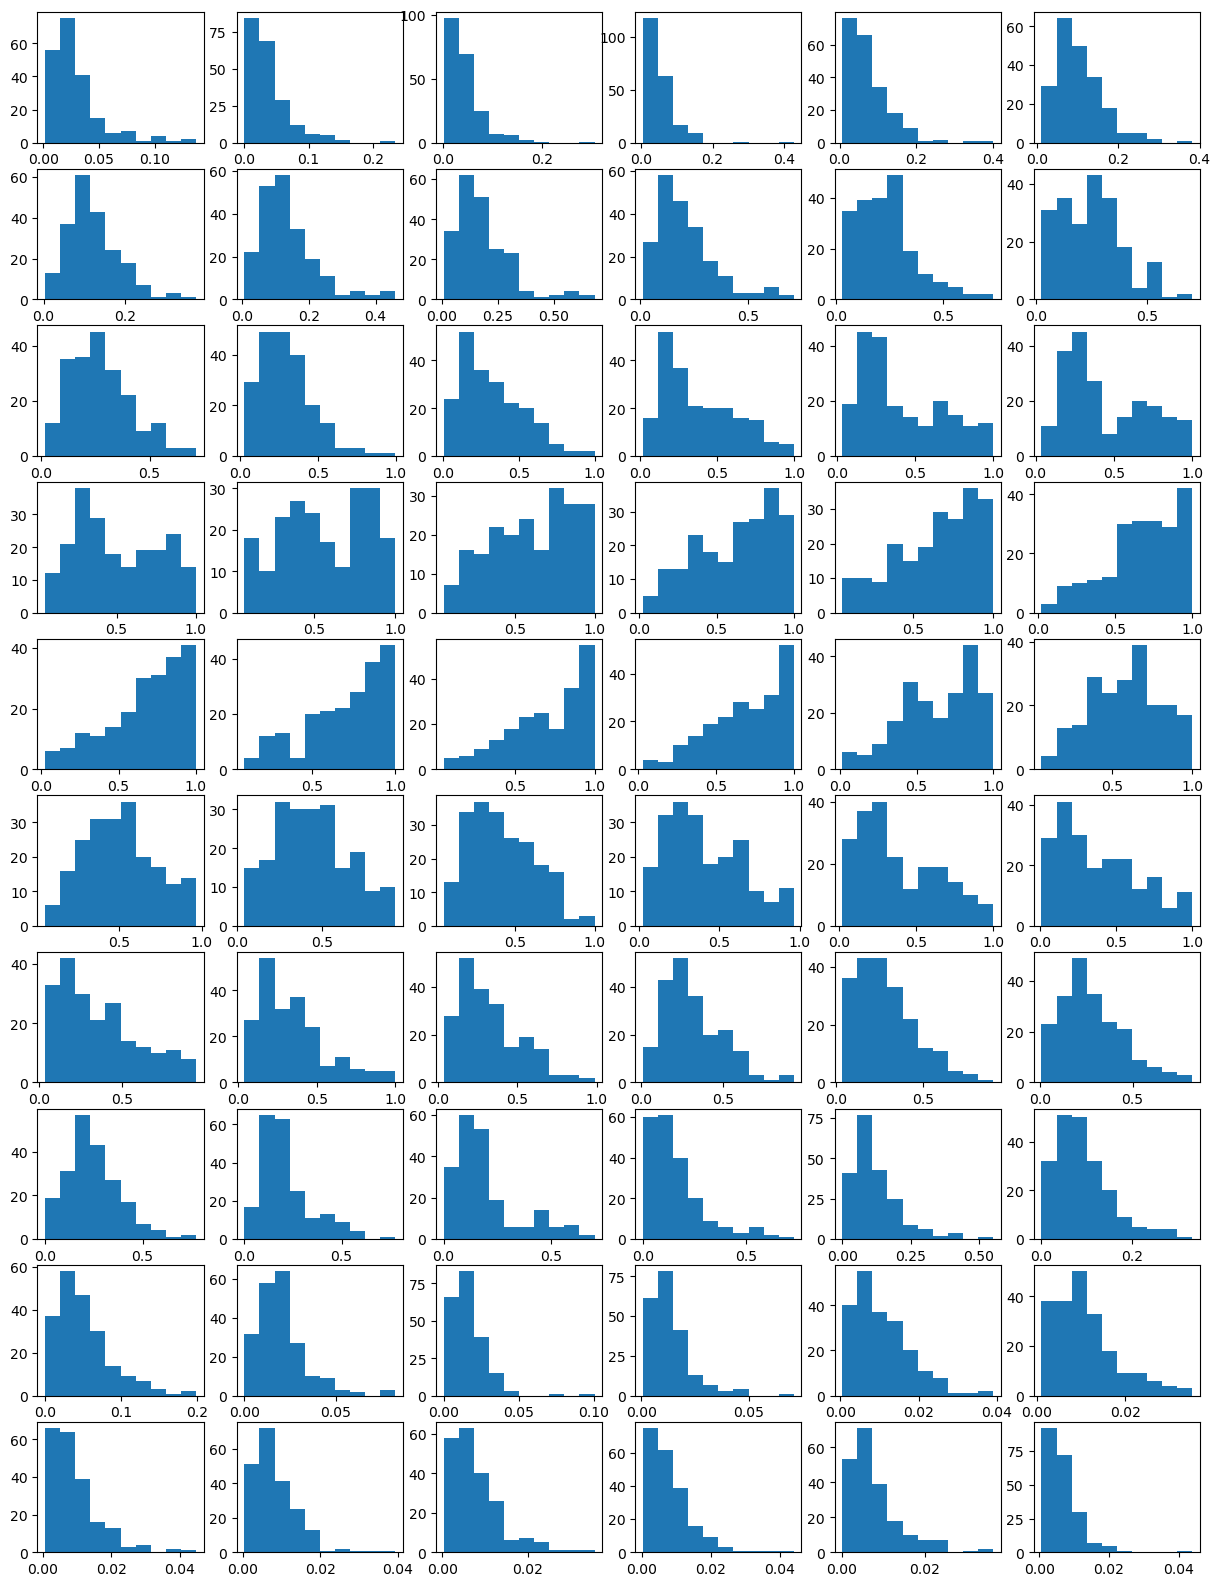

In [5]:
plt.figure(figsize = (15, 20))
for colIndex in range(len(numCols)):
    plt.subplot(10, 6, colIndex + 1)
    plt.hist(data[numCols[colIndex]])

### Create labels for data

In [6]:
target = 60
target_mapper = {'R': 0, 'M': 1}
def target_encode(val):
    return target_mapper[val]

data[target] = data[target].apply(target_encode)

### Separate X and Y

In [7]:
X = data.drop(target, axis = 1)
y = data[target]

### Scale data

In [8]:
X_feature = X
X = StandardScaler().fit_transform(X)

### Split train test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

### Fit model and predict

In [10]:
model = LogisticRegression(solver='liblinear',penalty='l2', C=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Check performance of model

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        22
           1       0.70      0.80      0.74        20

    accuracy                           0.74        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.74      0.74      0.74        42

